In [2]:
# Standard math libraries
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib.cm import get_cmap

from PIL import Image

import re
import json

import sys
from time import sleep

In [54]:
from highlight_text import HighlightText, ax_text, fig_text

In [3]:
def createTennisCourt(linecolor='white', ax=None, lw=2, alp=1, court_xlims=(-13,13), court_ylims=(-15,15)):
    '''
    Plots a Tennis Court with adjustable line colour, width and court limits
    '''
    if ax is None:
        ax = plt.gca()

    # Court Dimensions
    width_doub = 10.97
    width_sing = 8.23
    length_half = 11.89
    length_service = 6.4

    # Baseline Bottom
    ax.plot([-width_doub/2,width_doub/2], [-length_half]*2, color=linecolor, linewidth=lw, alpha=alp)
    # Baseline Top
    ax.plot([-width_doub/2,width_doub/2], [length_half]*2, color=linecolor, linewidth=lw, alpha=alp)
    # Horizontal Center Line
    ax.plot([-width_doub/2,width_doub/2], [0]*2, color=linecolor, linewidth=lw, alpha=alp)

    # Service Line Bottom
    ax.plot([-width_sing/2,width_sing/2], [-length_service]*2, color=linecolor, linewidth=lw, alpha=alp)
    # Service Line Top
    ax.plot([-width_sing/2,width_sing/2], [length_service]*2, color=linecolor, linewidth=lw, alpha=alp)


    ax.plot([-width_doub/2]*2, [-length_half,length_half], color=linecolor, linewidth=lw, alpha=alp)
    ax.plot([width_doub/2]*2, [-length_half,length_half], color=linecolor, linewidth=lw, alpha=alp)

    ax.plot([-width_sing/2]*2, [-length_half,length_half], color=linecolor, linewidth=lw, alpha=alp)
    ax.plot([width_sing/2]*2, [-length_half,length_half], color=linecolor, linewidth=lw, alpha=alp)

    ax.plot([0]*2, [-length_service,length_service], color=linecolor, linewidth=lw, alpha=alp)

    # Baseline thing
    ax.plot([0]*2, [-length_half,-length_half+0.5], color=linecolor, linewidth=lw, alpha=alp)
    ax.plot([0]*2, [length_half,length_half-0.5], color=linecolor, linewidth=lw, alpha=alp)


    # ax.set_xlim(-width_doub/2-6.41,width_doub/2+6.41)
    # ax.set_ylim(-length_half-9,length_half+9)
    #plt.gca().invert_yaxis()

    ax.set_xlim(court_xlims)
    ax.set_ylim(court_ylims)

In [4]:
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

mpl.rcParams['xtick.color'] = '#1f1f1f'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.color'] = '#1f1f1f'
mpl.rcParams['ytick.labelsize'] = 13

mpl.rc('font', family='Calibri')

In [5]:
from collections import namedtuple
from scipy.stats import binned_statistic_2d

def calc_binstat(x, y, bins, pitch_range):
    '''
    For Heatmap binning purposes
    '''

    _BinnedStatisticResult = namedtuple('BinnedStatisticResult',
                                        ('statistic', 'x_grid', 'y_grid', 'cx', 'cy'))

    x = np.ravel(x)
    y = np.ravel(y)

    values = np.ravel(x)

    #bins = (3,1)
    statistic = 'count'
    #pitch_range = [[-8.23/2, 0], [0,6.4]]
    statistic, x_edge, y_edge, _ = binned_statistic_2d(x, y, values, statistic=statistic,
                                                        bins=bins, range=pitch_range)

    statistic = statistic.T
    statistic = statistic / statistic.sum()

    x_grid, y_grid = np.meshgrid(x_edge, y_edge)

    cx, cy = np.meshgrid(x_edge[:-1] + 0.5 * np.diff(x_edge),
                            y_edge[:-1] + 0.5 * np.diff(y_edge))

    stats = _BinnedStatisticResult(statistic, x_grid, y_grid, cx, cy)._asdict()

    return stats

In [10]:
file = "AO_R2_Andy-Murray_Thanasi-Kokkinakis_2023.csv"
df = pd.read_csv("AO_R2_Andy-Murray_Thanasi-Kokkinakis_2023.csv")

In [14]:
player1 = file.split('_')[2].replace("-"," ")
player2 = file.split('_')[3].replace("-"," ")

In [17]:
#df_plot[df_plot.Outcome=="Ace"]

C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\3916636895.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\3916636895.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)


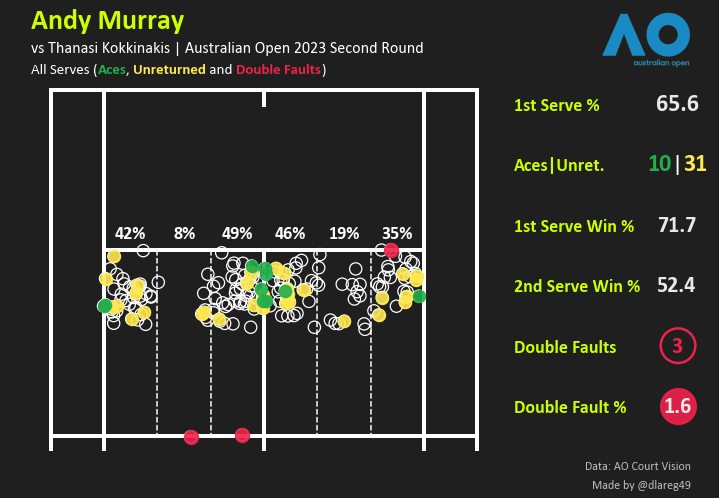

In [156]:
gs = gridspec.GridSpec(2,2, width_ratios=[2.5,1], height_ratios=[1,7])

fig, axs = plt.subplots(figsize=(12, 8), facecolor="#1f1f1f")

#data_list = [data_1st, data_2nd]
serves = ['1st', '2nd']

ax = plt.subplot(gs[1,0])
ax.set_facecolor("#1f1f1f")

createTennisCourt(ax=ax, lw=4, court_xlims=(-6,6), court_ylims=(-0.5,12.5))

df_plot = df[df.Serving==1]

# Transformed XY Data
x = df_plot.X
y = df_plot.Y

ax.scatter(x, y, zorder=10, \
    ec='w',s=150, color='None', alpha=1, lw=1.25)

# Unret.
df_unret = df_plot[(df_plot.Rally_Length==1) & (df_plot.Outcome!="Ace")]
ax.scatter(df_unret.X, df_unret.Y, marker='o', color="#FEE851", zorder=12, s=150, ec="#FEE851", lw=1.25, alpha=0.9)

# Aces
df_ace = df_plot[df_plot.Outcome=="Ace"]
ax.scatter(df_ace.X, df_ace.Y, marker='o', color="#22AF4B", zorder=12, s=150, ec="#22AF4B", lw=1.25, alpha=0.9)

# DFs
df_df = df_plot[df_plot.Shot_Type=="Double Faults"]
ax.scatter(df_df.X, df_df.Y, marker='o', color="#EE224A", zorder=12, s=200, ec="#EE224A", lw=1.25, alpha=0.9)

################################
# Stats subplot

ax1 = plt.subplot(gs[1,1])
ax1.set_facecolor("#1f1f1f")

color_stat = "darkgray"
color_tit = "#ccff00"

ax1.annotate(f'1st Serve %', (0, 0.9), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Aces|Unret.', (0, 0.74), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'1st Serve Win %', (0, 0.58), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'2nd Serve Win %', (0, 0.42), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Faults', (0, 0.26), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Fault %', (0, 0.1), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')

alp = 0.9
df_first = df_plot[df_plot.Shot_Type=="First Serve"]
df_second = df_plot[df_plot.Shot_Type=="Second Serve"]
ax1.annotate(np.round(len(df_first)*100/len(df_plot),1), (0.875, 0.9), xycoords = 'axes fraction', fontsize=24, color='w', ha='center', weight='bold', alpha=alp)
#ax1.annotate('10|31', (0.875, 0.74), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
HighlightText(x=0.875, y=0.73,
            s=f'<{len(df_ace)}>|<{len(df_unret)}>',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        ], fontsize=24, color='w', zorder=30,
                        ax=ax1, ha='center', va="bottom")
# First serve win %
ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
# Second serve win %
ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
ax1.annotate(len(df_df), (0.875, 0.26), xycoords = 'axes fraction', fontsize=22, color="#EE224A", ha='center', weight='bold', alpha=1)
ax1.annotate(np.round(len(df_df)*100/len(df_plot), 1), (0.875, 0.1), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)

ax1.annotate('Data: AO Court Vision', (0.95, -0.05), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')
ax1.annotate('Made by @dlareg49', (0.95, -0.1), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')


ax1.scatter(0.88,0.26+0.018,marker='o',s=1200, color="None", ec="#EE224A", lw=2.5)
ax1.scatter(0.88,0.118,marker='o',s=1200, color="#EE224A", ec="#EE224A", lw=2.5, alpha=0.9)

ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#Figure Title
ax2 = plt.subplot(gs[0])
ax2.set_facecolor("#1f1f1f")

ax2.annotate(player1, (0, 0.9), xycoords = 'axes fraction', fontsize=28, color=color_tit, ha='left',  va='center', weight='bold')

ax2.annotate(f'vs {player2} | Australian Open 2023 Second Round', (0, 0.4), xycoords = 'axes fraction', fontsize=16, color='w', ha='left', va='center')

ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

# You can use the wrapper around the class
HighlightText(x=0, y=0,
            s=f'All Serves (<Aces>, <Unreturned> and <Double Faults>)',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        {"color": '#EE224A', "weight": "bold",},
                        ], fontsize=15, color='w', zorder=30,
                        ax=ax2, va='center')


a = Image.open("../logos/AO.png")
    

newax = fig.add_axes([0.775,0.775,0.125,0.125], anchor='C', zorder=15)
newax.imshow(a, alpha=0.95)
newax.axis('off')


####################################
# Zonal Service Splits

x = df_plot[~(df_plot.Outcome=="DoubleFault")].X
y = df_plot[~(df_plot.Outcome=="DoubleFault")].Y

xend_deu = x[x<0]
yend_deu = y[x<0]

# Ad Court Serves
xend_ad = x[x>0]
yend_ad = y[x>0]

xends = [xend_deu, xend_ad]
yends = [yend_deu, yend_ad]
starts = ["Deuce", "AD"]
x_bounds  = [[-8.23/2, 0], [0, 8.23/2]]


for z in range(2):

    # Compute binned service hit points (split into third zones)
    stats = calc_binstat(xends[z], yends[z], (3,1), [x_bounds[z], [0,6.4]])

    for i, ratio in enumerate(stats['statistic'][0]):
        ratio = int(np.round(ratio*100))
        ax.annotate(f"{ratio}%", (stats['cx'][0][i], 6.8), c='white', ha='center', fontsize=18, weight='bold')
    ax.plot([0-(z+1)*(8.23/6)]*2, [6.4,0], ls='--', color='w')
    ax.plot([0+(z+1)*(8.23/6)]*2, [6.4,0], ls='--', color='w')

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.01)


In [158]:
fig.savefig("01_MuryGoat.png", bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())

### 2. Figure 2 Kok

C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\3294847028.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\3294847028.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)


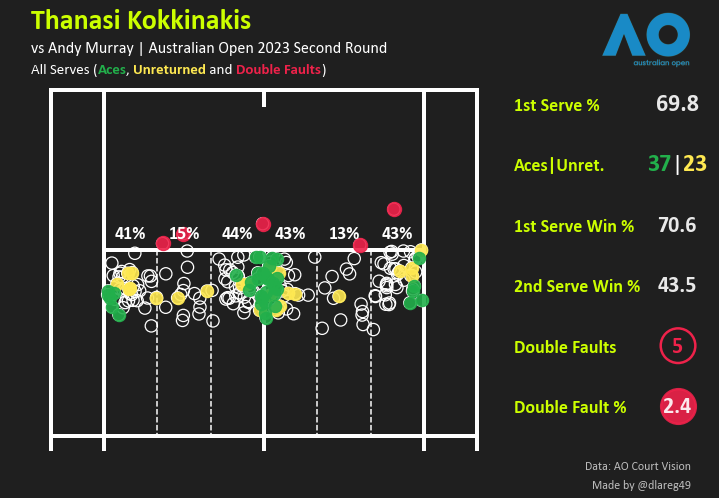

In [88]:
gs = gridspec.GridSpec(2,2, width_ratios=[2.5,1], height_ratios=[1,7])

fig, axs = plt.subplots(figsize=(12, 8), facecolor="#1f1f1f")

#data_list = [data_1st, data_2nd]
serves = ['1st', '2nd']

ax = plt.subplot(gs[1,0])
ax.set_facecolor("#1f1f1f")

createTennisCourt(ax=ax, lw=4, court_xlims=(-6,6), court_ylims=(-0.5,12.5))

df_plot = df[df.Serving==2]

# Transformed XY Data
x = df_plot.X
y = df_plot.Y

ax.scatter(x, y, zorder=10, \
    ec='w',s=150, color='None', alpha=1, lw=1.25)

# Unret.
df_unret = df_plot[(df_plot.Rally_Length==1) & (df_plot.Outcome!="Ace")]
ax.scatter(df_unret.X, df_unret.Y, marker='o', color="#FEE851", zorder=12, s=150, ec="#FEE851", lw=1.25, alpha=0.9)

# Aces
df_ace = df_plot[df_plot.Outcome=="Ace"]
ax.scatter(df_ace.X, df_ace.Y, marker='o', color="#22AF4B", zorder=12, s=150, ec="#22AF4B", lw=1.25, alpha=0.9)

# DFs
df_df = df_plot[df_plot.Shot_Type=="Double Faults"]
ax.scatter(df_df.X, df_df.Y, marker='o', color="#EE224A", zorder=12, s=200, ec="#EE224A", lw=1.25, alpha=0.9)

################################
# Stats subplot

ax1 = plt.subplot(gs[1,1])
ax1.set_facecolor("#1f1f1f")

color_stat = "darkgray"
color_tit = "#ccff00"

ax1.annotate(f'1st Serve %', (0, 0.9), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Aces|Unret.', (0, 0.74), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'1st Serve Win %', (0, 0.58), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'2nd Serve Win %', (0, 0.42), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Faults', (0, 0.26), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Fault %', (0, 0.1), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')

alp = 0.9
df_first = df_plot[df_plot.Shot_Type=="First Serve"]
df_second = df_plot[df_plot.Shot_Type=="Second Serve"]
ax1.annotate(np.round(len(df_first)*100/len(df_plot),1), (0.875, 0.9), xycoords = 'axes fraction', fontsize=24, color='w', ha='center', weight='bold', alpha=alp)
#ax1.annotate('10|31', (0.875, 0.74), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
HighlightText(x=0.875, y=0.73,
            s=f'<{len(df_ace)}>|<{len(df_unret)}>',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        ], fontsize=24, color='w', zorder=30,
                        ax=ax1, ha='center', va="bottom")
# First serve win %
ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
# Second serve win %
ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
ax1.annotate(len(df_df), (0.875, 0.26), xycoords = 'axes fraction', fontsize=22, color="#EE224A", ha='center', weight='bold', alpha=1)
ax1.annotate(np.round(len(df_df)*100/len(df_plot), 1), (0.875, 0.1), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)

ax1.annotate('Data: AO Court Vision', (0.95, -0.05), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')
ax1.annotate('Made by @dlareg49', (0.95, -0.1), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')


ax1.scatter(0.88,0.26+0.018,marker='o',s=1200, color="None", ec="#EE224A", lw=2.5)
ax1.scatter(0.88,0.118,marker='o',s=1200, color="#EE224A", ec="#EE224A", lw=2.5, alpha=0.9)

ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#Figure Title
ax2 = plt.subplot(gs[0])
ax2.set_facecolor("#1f1f1f")

ax2.annotate(player2, (0, 0.9), xycoords = 'axes fraction', fontsize=28, color=color_tit, ha='left',  va='center', weight='bold')

ax2.annotate(f'vs {player1} | Australian Open 2023 Second Round', (0, 0.4), xycoords = 'axes fraction', fontsize=16, color='w', ha='left', va='center')

ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

# You can use the wrapper around the class
HighlightText(x=0, y=0,
            s=f'All Serves (<Aces>, <Unreturned> and <Double Faults>)',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        {"color": '#EE224A', "weight": "bold",},
                        ], fontsize=15, color='w', zorder=30,
                        ax=ax2, va='center')


a = Image.open("../logos/AO.png")
    

newax = fig.add_axes([0.775,0.775,0.125,0.125], anchor='C', zorder=15)
newax.imshow(a, alpha=0.95)
newax.axis('off')


####################################
# Zonal Service Splits

x = df_plot[~(df_plot.Outcome=="DoubleFault")].X
y = df_plot[~(df_plot.Outcome=="DoubleFault")].Y

xend_deu = x[x<0]
yend_deu = y[x<0]

# Ad Court Serves
xend_ad = x[x>0]
yend_ad = y[x>0]

xends = [xend_deu, xend_ad]
yends = [yend_deu, yend_ad]
starts = ["Deuce", "AD"]
x_bounds  = [[-8.23/2, 0], [0, 8.23/2]]


for z in range(2):

    # Compute binned service hit points (split into third zones)
    stats = calc_binstat(xends[z], yends[z], (3,1), [x_bounds[z], [0,6.4]])

    for i, ratio in enumerate(stats['statistic'][0]):
        ratio = int(np.round(ratio*100))
        ax.annotate(f"{ratio}%", (stats['cx'][0][i], 6.8), c='white', ha='center', fontsize=18, weight='bold', zorder=50)
    ax.plot([0-(z+1)*(8.23/6)]*2, [6.4,0], ls='--', color='w')
    ax.plot([0+(z+1)*(8.23/6)]*2, [6.4,0], ls='--', color='w')

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.01)


In [90]:
fig.savefig("02_Thanasi.png", bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())

### 3. Fig 3 Mury under Pressure

In [260]:
df_p1[((df_p1.Player1_Score < df_p1.Player2_Score) | (df_p1.Player2_Score == "AD") ) & (df_p1.Player2_Score != "G") ].index

Int64Index([ 26,  28,  29,  30,  34,  42,  43,  44,  67,  79, 109, 110, 111,
            135, 138, 139, 142, 143, 152, 153, 154, 180, 181, 182, 183, 231,
            232, 233, 237, 241, 263, 267, 269, 291, 302, 306, 308, 326, 367],
           dtype='int64')

In [337]:
df_p1 = df[df.Serving==1]
# Find service points where Murray was trailing i.e. after prev point, p2 had greater point than p1
df_plot = df_p1[df_p1.index.isin( df_p1[((df_p1.Player1_Score < df_p1.Player2_Score) | (df_p1.Player2_Score == "AD") ) & (df_p1.Player2_Score != "G") ].index + 1 )]

C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\1164678556.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\1164678556.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)


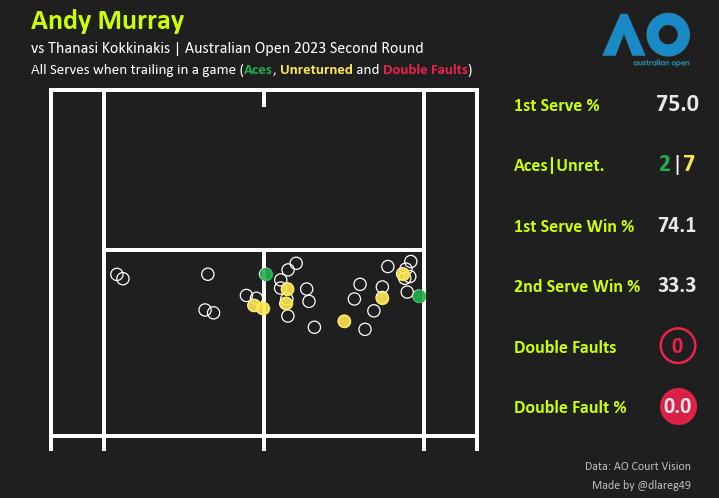

In [266]:
gs = gridspec.GridSpec(2,2, width_ratios=[2.5,1], height_ratios=[1,7])

fig, axs = plt.subplots(figsize=(12, 8), facecolor="#1f1f1f")

#data_list = [data_1st, data_2nd]
serves = ['1st', '2nd']

ax = plt.subplot(gs[1,0])
ax.set_facecolor("#1f1f1f")

createTennisCourt(ax=ax, lw=4, court_xlims=(-6,6), court_ylims=(-0.5,12.5))

#df_plot = df[df.Serving==1]

# Transformed XY Data
x = df_plot.X
y = df_plot.Y

ax.scatter(x, y, zorder=10, \
    ec='w',s=150, color='None', alpha=1, lw=1.25)

# Unret.
df_unret = df_plot[(df_plot.Rally_Length==1) & (df_plot.Outcome!="Ace")]
ax.scatter(df_unret.X, df_unret.Y, marker='o', color="#FEE851", zorder=12, s=150, ec="#FEE851", lw=1.25, alpha=0.9)

# Aces
df_ace = df_plot[df_plot.Outcome=="Ace"]
ax.scatter(df_ace.X, df_ace.Y, marker='o', color="#22AF4B", zorder=12, s=150, ec="#22AF4B", lw=1.25, alpha=0.9)

# DFs
df_df = df_plot[df_plot.Shot_Type=="Double Faults"]
ax.scatter(df_df.X, df_df.Y, marker='o', color="#EE224A", zorder=12, s=200, ec="#EE224A", lw=1.25, alpha=0.9)

################################
# Stats subplot

ax1 = plt.subplot(gs[1,1])
ax1.set_facecolor("#1f1f1f")

color_stat = "darkgray"
color_tit = "#ccff00"

ax1.annotate(f'1st Serve %', (0, 0.9), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Aces|Unret.', (0, 0.74), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'1st Serve Win %', (0, 0.58), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'2nd Serve Win %', (0, 0.42), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Faults', (0, 0.26), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Fault %', (0, 0.1), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')

alp = 0.9
df_first = df_plot[df_plot.Shot_Type=="First Serve"]
df_second = df_plot[df_plot.Shot_Type=="Second Serve"]
ax1.annotate(np.round(len(df_first)*100/len(df_plot),1), (0.875, 0.9), xycoords = 'axes fraction', fontsize=24, color='w', ha='center', weight='bold', alpha=alp)
#ax1.annotate('10|31', (0.875, 0.74), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
HighlightText(x=0.875, y=0.73,
            s=f'<{len(df_ace)}>|<{len(df_unret)}>',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        ], fontsize=24, color='w', zorder=30,
                        ax=ax1, ha='center', va="bottom")
# First serve win %
ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
# Second serve win %
ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
ax1.annotate(len(df_df), (0.875, 0.26), xycoords = 'axes fraction', fontsize=22, color="#EE224A", ha='center', weight='bold', alpha=1)
ax1.annotate(np.round(len(df_df)*100/len(df_plot), 1), (0.875, 0.1), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)

ax1.annotate('Data: AO Court Vision', (0.95, -0.05), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')
ax1.annotate('Made by @dlareg49', (0.95, -0.1), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')


ax1.scatter(0.88,0.26+0.018,marker='o',s=1200, color="None", ec="#EE224A", lw=2.5)
ax1.scatter(0.88,0.118,marker='o',s=1200, color="#EE224A", ec="#EE224A", lw=2.5, alpha=0.9)

ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#Figure Title
ax2 = plt.subplot(gs[0])
ax2.set_facecolor("#1f1f1f")

ax2.annotate(player1, (0, 0.9), xycoords = 'axes fraction', fontsize=28, color=color_tit, ha='left',  va='center', weight='bold')

ax2.annotate(f'vs {player2} | Australian Open 2023 Second Round', (0, 0.4), xycoords = 'axes fraction', fontsize=16, color='w', ha='left', va='center')

ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

# You can use the wrapper around the class
HighlightText(x=0, y=0,
            s=f'All Serves when trailing in a game (<Aces>, <Unreturned> and <Double Faults>)',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        {"color": '#EE224A', "weight": "bold",},
                        ], fontsize=15, color='w', zorder=30,
                        ax=ax2, va='center')


a = Image.open("../logos/AO.png")
    

newax = fig.add_axes([0.775,0.775,0.125,0.125], anchor='C', zorder=15)
newax.imshow(a, alpha=0.95)
newax.axis('off')

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.01)


In [338]:
df_plot.Outcome.value_counts()

Winner    21
Lost      13
Ace        2
Name: Outcome, dtype: int64

In [339]:
len(df_plot)

36

In [342]:
10/14

0.7142857142857143

In [340]:
# Point won % when trailing
23/(23+13)

0.6388888888888888

In [152]:
fig.savefig("03_MuryGoat_losing.png", bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())

## When facing Break Point

In [353]:
df_p1[df_p1.Shot_Type=="First Serve"]["Speed_kmh"].mean()

177.65833333333333

In [352]:
#df_plot.sort_values("Speed_kmh").tail()
df_plot[df_plot.Shot_Type=="First Serve"]["Speed_kmh"].mean()

182.25

In [358]:
df_win[df_win.Serving==1].Stroke_Hand.value_counts()

Forehand    37
Backhand    22
-           10
Name: Stroke_Hand, dtype: int64

In [343]:
df_p1 = df[df.Serving==1]
# Find service points where Murray was break point down 
df_plot = df_p1[df_p1.index.isin(df_p1[( (df_p1.Player2_Score=="40") & ~(df_p1.Player1_Score.isin(["40","AD", "G"])) ) | (df_p1.Player2_Score == "AD") ].index+1)]

C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\319926122.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\319926122.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)


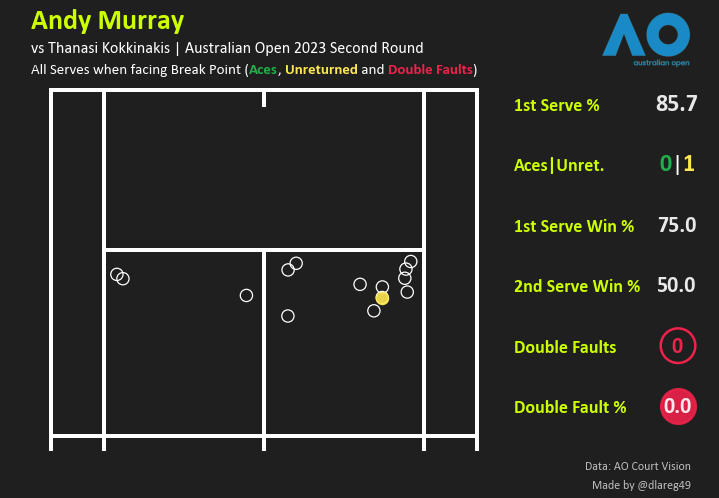

In [154]:
gs = gridspec.GridSpec(2,2, width_ratios=[2.5,1], height_ratios=[1,7])

fig, axs = plt.subplots(figsize=(12, 8), facecolor="#1f1f1f")

#data_list = [data_1st, data_2nd]
serves = ['1st', '2nd']

ax = plt.subplot(gs[1,0])
ax.set_facecolor("#1f1f1f")

createTennisCourt(ax=ax, lw=4, court_xlims=(-6,6), court_ylims=(-0.5,12.5))

#df_plot = df[df.Serving==1]

# Transformed XY Data
x = df_plot.X
y = df_plot.Y

ax.scatter(x, y, zorder=10, \
    ec='w',s=150, color='None', alpha=1, lw=1.25)

# Unret.
df_unret = df_plot[(df_plot.Rally_Length==1) & (df_plot.Outcome!="Ace")]
ax.scatter(df_unret.X, df_unret.Y, marker='o', color="#FEE851", zorder=12, s=150, ec="#FEE851", lw=1.25, alpha=0.9)

# Aces
df_ace = df_plot[df_plot.Outcome=="Ace"]
ax.scatter(df_ace.X, df_ace.Y, marker='o', color="#22AF4B", zorder=12, s=150, ec="#22AF4B", lw=1.25, alpha=0.9)

# DFs
df_df = df_plot[df_plot.Shot_Type=="Double Faults"]
ax.scatter(df_df.X, df_df.Y, marker='o', color="#EE224A", zorder=12, s=200, ec="#EE224A", lw=1.25, alpha=0.9)

################################
# Stats subplot

ax1 = plt.subplot(gs[1,1])
ax1.set_facecolor("#1f1f1f")

color_stat = "darkgray"
color_tit = "#ccff00"

ax1.annotate(f'1st Serve %', (0, 0.9), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Aces|Unret.', (0, 0.74), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'1st Serve Win %', (0, 0.58), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'2nd Serve Win %', (0, 0.42), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Faults', (0, 0.26), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Double Fault %', (0, 0.1), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')

alp = 0.9
df_first = df_plot[df_plot.Shot_Type=="First Serve"]
df_second = df_plot[df_plot.Shot_Type=="Second Serve"]
ax1.annotate(np.round(len(df_first)*100/len(df_plot),1), (0.875, 0.9), xycoords = 'axes fraction', fontsize=24, color='w', ha='center', weight='bold', alpha=alp)
#ax1.annotate('10|31', (0.875, 0.74), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
HighlightText(x=0.875, y=0.73,
            s=f'<{len(df_ace)}>|<{len(df_unret)}>',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        ], fontsize=24, color='w', zorder=30,
                        ax=ax1, ha='center', va="bottom")
# First serve win %
ax1.annotate(np.round(len(df_first[df_plot.Outcome.isin(["Winner", "Ace"])])*100/len(df_first), 1), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
# Second serve win %
ax1.annotate(np.round(len(df_second[df_plot.Outcome.isin(["Winner", "Ace"])])*100/(len(df_second)+len(df_df)), 1), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
ax1.annotate(len(df_df), (0.875, 0.26), xycoords = 'axes fraction', fontsize=22, color="#EE224A", ha='center', weight='bold', alpha=1)
ax1.annotate(np.round(len(df_df)*100/len(df_plot), 1), (0.875, 0.1), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)

ax1.annotate('Data: AO Court Vision', (0.95, -0.05), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')
ax1.annotate('Made by @dlareg49', (0.95, -0.1), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')


ax1.scatter(0.88,0.26+0.018,marker='o',s=1200, color="None", ec="#EE224A", lw=2.5)
ax1.scatter(0.88,0.118,marker='o',s=1200, color="#EE224A", ec="#EE224A", lw=2.5, alpha=0.9)

ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#Figure Title
ax2 = plt.subplot(gs[0])
ax2.set_facecolor("#1f1f1f")

ax2.annotate(player1, (0, 0.9), xycoords = 'axes fraction', fontsize=28, color=color_tit, ha='left',  va='center', weight='bold')

ax2.annotate(f'vs {player2} | Australian Open 2023 Second Round', (0, 0.4), xycoords = 'axes fraction', fontsize=16, color='w', ha='left', va='center')

ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

# You can use the wrapper around the class
HighlightText(x=0, y=0,
            s=f'All Serves when facing Break Point (<Aces>, <Unreturned> and <Double Faults>)',
    highlight_textprops=[{"color": '#22AF4B', "weight": "bold",},
                        {"color": '#FEE851', "weight": "bold",},
                        {"color": '#EE224A', "weight": "bold",},
                        ], fontsize=15, color='w', zorder=30,
                        ax=ax2, va='center')


a = Image.open("../logos/AO.png")
    

newax = fig.add_axes([0.775,0.775,0.125,0.125], anchor='C', zorder=15)
newax.imshow(a, alpha=0.95)
newax.axis('off')

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.01)


In [155]:
fig.savefig("04_MuryGoat_BP.png", bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())

## 5. Winners

In [301]:
df_win = pd.read_csv("AO_R2_Andy-Murray_Thanasi-Kokkinakis_2023_winners.csv")

In [302]:
df_win.Serving.value_counts()

2    102
1     69
Name: Serving, dtype: int64

In [303]:
df_plot = df_win[(df_win.Serving==1) & (df_win.Outcome!="Ace")]

In [328]:
df_win[(df_win.Serving==2) & (df_win.Outcome!="Ace")].Stroke_Type.value_counts()

Ground      38
Volley      10
Passing      4
Overhead     3
Drop         1
Name: Stroke_Type, dtype: int64

In [330]:
len(df_plot)

59

In [331]:
df_plot.Stroke_Type

0           NaN
3        Volley
8      Approach
10       Volley
17       Ground
20       Ground
21          NaN
26          NaN
28       Ground
31       Volley
32       Ground
33          NaN
36       Ground
38          NaN
40       Volley
48       Ground
50       Ground
51       Ground
53       Ground
54       Ground
57          NaN
64       Ground
72       Ground
75         Drop
81       Ground
83       Ground
86       Volley
87          NaN
88          NaN
89       Ground
91       Volley
94       Volley
95     Overhead
97       Ground
99       Ground
106      Ground
109    Overhead
111        Drop
115      Volley
123      Ground
126     Passing
127         Lob
129      Volley
131      Ground
132      Ground
133         NaN
137      Ground
145     Passing
146        Drop
149      Ground
152      Ground
153      Ground
158      Ground
159      Ground
163         NaN
166      Ground
168      Ground
169         NaN
170      Ground
Name: Stroke_Type, dtype: object

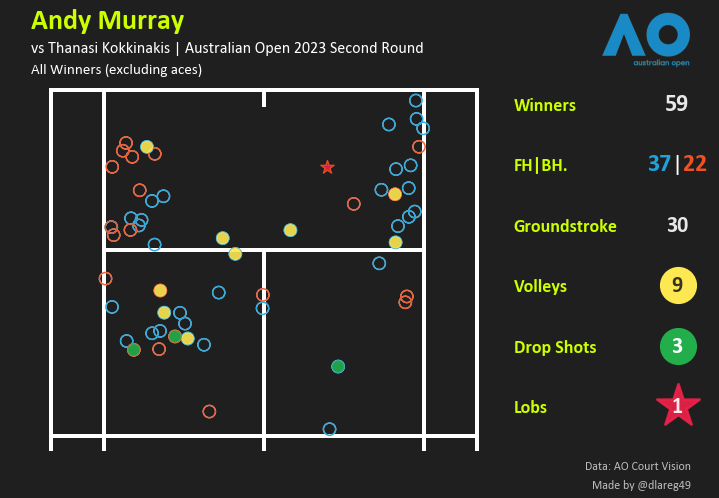

In [326]:
gs = gridspec.GridSpec(2,2, width_ratios=[2.5,1], height_ratios=[1,7])

fig, axs = plt.subplots(figsize=(12, 8), facecolor="#1f1f1f")

#data_list = [data_1st, data_2nd]
serves = ['1st', '2nd']

ax = plt.subplot(gs[1,0])
ax.set_facecolor("#1f1f1f")

createTennisCourt(ax=ax, lw=4, court_xlims=(-6,6), court_ylims=(-0.5,12.5))

#df_plot = df[df.Serving==1]

# Transformed XY Data
x = df_plot[~(df_plot.Stroke_Type=="Lob")].X
y = df_plot[~(df_plot.Stroke_Type=="Lob")].Y

ax.scatter(x, y, zorder=10, \
    ec='w',s=150, color='None', alpha=1, lw=1.25)

#1DA2DC
df_FH = df_plot[df_plot.Stroke_Hand=="Forehand"]
df_BH = df_plot[df_plot.Stroke_Hand=="Backhand"]
ax.scatter(df_FH.X, df_FH.Y, marker='o', color="None", zorder=12, s=150, ec="#1DA2DC", lw=1.5, alpha=0.9)
ax.scatter(df_BH[~(df_BH.Stroke_Type=="Lob")].X, df_BH[~(df_BH.Stroke_Type=="Lob")].Y, marker='o', color="None", zorder=12, s=150, ec="#F05123", lw=1.5, alpha=0.9)

# Unret.
df_volleys = df_plot[(df_plot.Stroke_Type=="Volley")]
ax.scatter(df_volleys.X, df_volleys.Y, marker='o', color="#FEE851", zorder=12, s=150, ec="None", lw=1.25, alpha=0.9)

# Drop
df_ace = df_plot[df_plot.Stroke_Type=="Drop"]
ax.scatter(df_ace.X, df_ace.Y, marker='o', color="#22AF4B", zorder=12, s=150, ec="None", lw=1.25, alpha=0.9)

# Lob
df_lob = df_plot[df_plot.Stroke_Type=="Lob"]
ax.scatter(df_lob.X, df_lob.Y, marker='*', color="#EE224A", zorder=12, s=200, ec="#F05123", lw=1.25, alpha=0.9)


# DFs
#df_df = df_plot[df_plot.Shot_Type=="Double Faults"]
#ax.scatter(df_df.X, df_df.Y, marker='o', color="#EE224A", zorder=12, s=200, ec="#EE224A", lw=1.25, alpha=0.9)

################################
# Stats subplot

ax1 = plt.subplot(gs[1,1])
ax1.set_facecolor("#1f1f1f")

color_stat = "darkgray"
color_tit = "#ccff00"

ax1.annotate(f'Winners', (0, 0.9), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'FH|BH.', (0, 0.74), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Groundstroke', (0, 0.58), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Volleys', (0, 0.42), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Drop Shots', (0, 0.26), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')
ax1.annotate(f'Lobs', (0, 0.1), xycoords = 'axes fraction', fontsize=18, color=color_tit, ha='left', weight='bold')

alp = 0.9

ax1.annotate(len(df_plot), (0.875, 0.9), xycoords = 'axes fraction', fontsize=24, color='w', ha='center', weight='bold', alpha=alp)
#ax1.annotate('10|31', (0.875, 0.74), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
HighlightText(x=0.875, y=0.73,
            s=f'<{len(df_FH)}>|<{len(df_BH)}>',
    highlight_textprops=[{"color": '#1DA2DC', "weight": "bold",},
                        {"color": '#F05123', "weight": "bold",},
                        ], fontsize=24, color='w', zorder=30,
                        ax=ax1, ha='center', va="bottom")
# First serve win %
ax1.annotate(len(df_plot[df_plot.Stroke_Type=="Ground"]), (0.875, 0.58), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)
# Second serve win %
ax1.annotate(len(df_plot[df_plot.Stroke_Type=="Volley"]), (0.875, 0.42), xycoords = 'axes fraction', fontsize=22, color='#1f1f1f', ha='center', weight='bold', alpha=alp)
ax1.annotate(len(df_plot[df_plot.Stroke_Type=="Drop"]), (0.875, 0.26), xycoords = 'axes fraction', fontsize=22, color="w", ha='center', weight='bold', alpha=1)
ax1.annotate(len(df_plot[df_plot.Stroke_Type=="Lob"]), (0.875, 0.1), xycoords = 'axes fraction', fontsize=22, color='w', ha='center', weight='bold', alpha=alp)

ax1.annotate('Data: AO Court Vision', (0.95, -0.05), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')
ax1.annotate('Made by @dlareg49', (0.95, -0.1), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')


ax1.scatter(0.88,0.42+0.018,marker='o',s=1200, color="#FEE851", ec="#FEE851", lw=2.5)
ax1.scatter(0.88,0.26+0.018,marker='o',s=1200, color="#22AF4B", ec="#22AF4B", lw=2.5)
ax1.scatter(0.88,0.118,marker='*',s=2000, color="#EE224A", ec="#EE224A", lw=2.5, alpha=0.9)

ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

#Figure Title
ax2 = plt.subplot(gs[0])
ax2.set_facecolor("#1f1f1f")

ax2.annotate(player1, (0, 0.9), xycoords = 'axes fraction', fontsize=28, color=color_tit, ha='left',  va='center', weight='bold')

ax2.annotate(f'vs {player2} | Australian Open 2023 Second Round', (0, 0.4), xycoords = 'axes fraction', fontsize=16, color='w', ha='left', va='center')

ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

# You can use the wrapper around the class
HighlightText(x=0, y=0,
            s=f'All Winners (<excluding aces)',
    highlight_textprops=[{"color": 'w', "weight": "bold",},
                        ], fontsize=15, color='w', zorder=30,
                        ax=ax2, va='center')


a = Image.open("../logos/AO.png")
    

newax = fig.add_axes([0.775,0.775,0.125,0.125], anchor='C', zorder=15)
newax.imshow(a, alpha=0.95)
newax.axis('off')

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.01)


In [332]:
fig.savefig("05_MuryGoat_Winners.png", bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())

In [171]:
df_wide_deu = df[(df.Serving==1) & (df.Shot_Type=="First Serve") & (df.X<(-8.23/3)) ]
df_T_deu = df[(df.Serving==1) & (df.Shot_Type=="First Serve") & (df.X>(-8.23/6)) & (df.X<0)]

df_wide_ad = df[(df.Serving==1) & (df.Shot_Type=="First Serve") & (df.X>(8.23/3)) ]
df_T_ad = df[(df.Serving==1) & (df.Shot_Type=="First Serve") & (df.X<(8.23/6)) & (df.X>0) ]

In [177]:
np.var([df_wide_deu.X, df_wide_deu.Y])

17.60784758406719

In [298]:
df_p1 = df[(df.Serving==1) & (df.Shot_Type=="First Serve") ]
# Find service points where Murray was trailing i.e. after prev point, p2 had greater point than p1
df_losing = df_p1[df_p1.index.isin( df_p1[((df_p1.Player1_Score < df_p1.Player2_Score) | (df_p1.Player2_Score == "AD") ) & (df_p1.Player2_Score != "G") ].index + 1 )]

In [289]:
df_wide_deu_l = df_losing[(df_losing.Serving==1) & (df_losing.Shot_Type=="First Serve") & (df_losing.X<(-8.23/3)) ]
df_T_deu_l = df_losing[(df_losing.Serving==1) & (df_losing.Shot_Type=="First Serve") & (df_losing.X>(-8.23/6)) & (df.X<0)]

df_wide_ad_l = df_losing[(df_losing.Serving==1) & (df_losing.Shot_Type=="First Serve") & (df_losing.X>(8.23/3)) ]
df_T_ad_l = df_losing[(df_losing.Serving==1) & (df_losing.Shot_Type=="First Serve") & (df_losing.X<(8.23/6)) & (df.X>0) ]

C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\878787459.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_T_deu_l = df_losing[(df_losing.Serving==1) & (df_losing.Shot_Type=="First Serve") & (df_losing.X>(-8.23/6)) & (df.X<0)]
C:\Users\lgjg1\AppData\Local\Temp\ipykernel_33184\878787459.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_T_ad_l = df_losing[(df_losing.Serving==1) & (df_losing.Shot_Type=="First Serve") & (df_losing.X<(8.23/6)) & (df.X>0) ]


In [290]:
import seaborn as sns

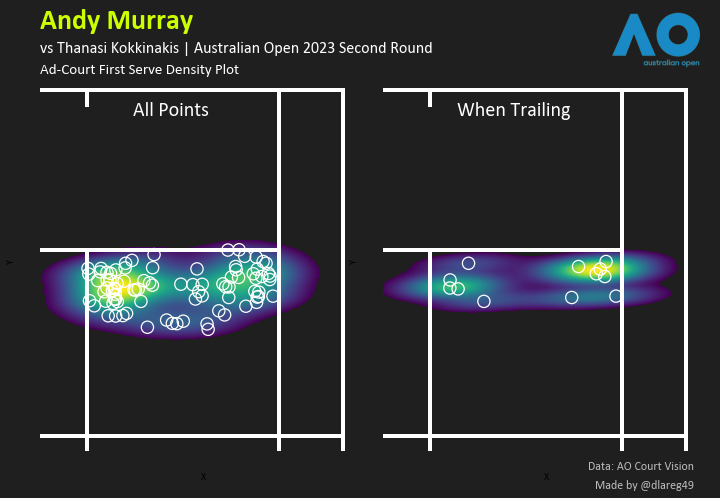

In [300]:

gs = gridspec.GridSpec(2,2, width_ratios=[1,1], height_ratios=[1,7])

fig, axs = plt.subplots(figsize=(12, 8), facecolor="#1f1f1f")

#data_list = [data_1st, data_2nd]
serves = ['1st', '2nd']

ax = plt.subplot(gs[1,0])
ax.set_facecolor("#1f1f1f")

createTennisCourt(ax=ax, lw=4, court_xlims=(-1,6), court_ylims=(-0.5,12.5))



################################
# Stats subplot

ax1 = plt.subplot(gs[1,1])
ax1.set_facecolor("#1f1f1f")

createTennisCourt(ax=ax1, lw=4, court_xlims=(-1,6), court_ylims=(-0.5,12.5))

#df_plot = df[df.Serving==1]

# Transformed XY Data

# sns.kdeplot(
#         data=df_T_ad, x="X", y="Y",
#         fill=True, thresh=0.05, levels=200, cmap="viridis", ax=ax, shade=True, zorder=0, alpha=1, cut=2,
#         bw_method=0.5, common_norm=True, multiple="stack")

# sns.kdeplot(
#         data=df_wide_ad, x="X", y="Y",
#         fill=True, thresh=0.05, levels=200, cmap="viridis", ax=ax, shade=True, zorder=0, alpha=1, cut=2,
#         bw_method=0.5, common_norm=True, multiple="stack")


# sns.kdeplot(
#         data=df_T_ad_l, x="X", y="Y",
#         fill=True, thresh=0.05, levels=200, cmap="viridis", ax=ax1, shade=True, zorder=0, alpha=1, cut=2,
#         bw_method=0.5, common_norm=True, multiple="stack")

# sns.kdeplot(
#         data=df_wide_ad_l, x="X", y="Y",
#         fill=True, thresh=0.05, levels=200, cmap="viridis", ax=ax1, shade=True, zorder=0, alpha=1, cut=2,
#         bw_method=0.5, common_norm=True, multiple="stack")

        

sns.kdeplot(
        data=df[(df.Serving==1) & (df.X > 0)], x="X", y="Y",
        fill=True, thresh=0.05, levels=200, cmap="viridis", ax=ax, shade=True, zorder=0, alpha=1, cut=2,
        bw_method=0.5, common_norm=True, multiple="stack")

sns.kdeplot(
        data=df_losing[df_losing.X>0], x="X", y="Y",
        fill=True, thresh=0.05, levels=200, cmap="viridis", ax=ax1, shade=True, zorder=0, alpha=1, cut=2,
        bw_method=0.5, common_norm=True, multiple="stack")

#Figure Title
ax2 = plt.subplot(gs[0])
ax2.set_facecolor("#1f1f1f")

ax2.annotate(player1, (0, 0.9), xycoords = 'axes fraction', fontsize=28, color=color_tit, ha='left',  va='center', weight='bold')

ax2.annotate(f'vs {player2} | Australian Open 2023 Second Round', (0, 0.4), xycoords = 'axes fraction', fontsize=16, color='w', ha='left', va='center')

ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

# You can use the wrapper around the class
HighlightText(x=0, y=0,
            s=f'Ad-Court First Serve Density Plot <a>',
    highlight_textprops=[{"color": '#1f1f1f', "weight": "bold",},
                        ], fontsize=15, color='w', zorder=30,
                        ax=ax2, va='center')

ax.annotate("All Points",(0.4,0.9), xycoords="axes fraction", va='center', ha='center', fontsize=20, color='w')
ax1.annotate("When Trailing",(0.4,0.9), xycoords="axes fraction", va='center', ha='center', fontsize=20, color='w')


a = Image.open("../logos/AO.png")
    

newax = fig.add_axes([0.775,0.775,0.125,0.125], anchor='C', zorder=15)
newax.imshow(a, alpha=0.95)
newax.axis('off')

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.01)

ax1.annotate('Data: AO Court Vision', (0.95, -0.05), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')
ax1.annotate('Made by @dlareg49', (0.95, -0.1), xycoords = 'axes fraction', fontsize=12, color='w', alpha=0.7, ha='right')

# ax1.scatter(np.mean(df_T_ad_l.X), np.mean(df_T_ad_l.Y), s=250, ec='w', lw=2, marker='X', color="#1DA2DC")
# ax1.scatter(np.mean(df_wide_ad_l.X), np.mean(df_wide_ad_l.Y), s=250, ec='w', lw=1.25, marker='X', color="#F05123")

# ax.scatter(np.mean(df_T_ad.X), np.mean(df_T_ad.Y), s=250, ec='w', lw=1.25, marker='X', color="#1DA2DC")
# ax.scatter(np.mean(df_wide_ad.X), np.mean(df_wide_ad.Y), s=250, ec='w', lw=1.25, marker='X', color="#F05123")

# ax.annotate("$CV_{x}$",(0.2,0.6), xycoords="axes fraction", va='center', ha='center', fontsize=20, color='w')

ax1.scatter(df_losing[df_losing.X>0].X, df_losing[df_losing.X>0].Y, zorder=10, \
    ec='w',s=150, color='None', alpha=1, lw=1.25)

    

ax.scatter(df[(df.Serving==1) & (df.X > 0)].X, df[(df.Serving==1) & (df.X > 0)].Y, zorder=10, \
    ec='w',s=150, color='None', alpha=1, lw=1.25)


In [234]:
np.std(df_T_ad.X)/np.mean(df_T_ad.X), np.std(df_T_ad_l.X)/np.mean(df_T_ad_l.X)

(0.5467244371844117, 0.4718015007938381)

In [235]:
np.std(df_T_ad.Y)/np.mean(df_T_ad.Y), np.std(df_T_ad_l.Y)/np.mean(df_T_ad_l.Y)

(0.09890875934183622, 0.10226597434458098)

In [233]:
np.std(df_wide_ad.X)/np.mean(df_wide_ad.X), np.std(df_wide_ad_l.X)/np.mean(df_wide_ad_l.X)

(0.08830093213570661, 0.08782415281591378)

In [236]:
np.std(df_wide_ad.Y)/np.mean(df_wide_ad.Y), np.std(df_wide_ad_l.Y)/np.mean(df_wide_ad_l.Y)

(0.08532740471114185, 0.0770994297868988)

In [238]:
len(df_T_ad_l)

11

In [ ]:
import seaborn as sns